# Grand Machine Learning Workshop - 12 May, 2018
---


## K-Nearest Neighbors Classification(KNN) Classification

- a supervised machine learning algorithm
- Intuitive, Simple to Understand, Easy to implement.
- Minimal training, but expensive testing.

In which class does the white circle belong to? orange or green?

![Image](assets/knn.png)

### 1. Algorithm

STEP 1: Choose the number K of neighbors

STEP 2: Take the K nearest neighbors of the new data point, according to your distance metric

STEP 3: Among these K neighbors, count the number of data points to each category

STEP 4: Assign the new data point to the category where you counted the most neighbors

###  Distance Metric
Lets use `Euclidean distance` for now.<br/><br/>
$For\ X = (x_1,x_2 \dotsc x_n),\ Y = (y_1,y_2 \dotsc y_n)$,<br/>
$Euclidean\ Distance\ d(X, Y) = \sqrt{\left(x_1 - y_1 \right)^2 + \left(x_2 - y_2 \right)^2 + \dotsc + \left(x_n - y_n \right)^2} $

![distance](assets/distance.gif)

---
## 1.3 Dataset

This popular dataset has 150 observations of iris plants of three species.

Types of Iris Flower:
 - Setosa
 - Versicolor
 - Virginica

![iris](assets/iris.png)

# 2. Hands-on Machine Learning

### 2.1 Obtaining the dataset

Download the iris dataset from UCI ML Repository.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Online link/path to the data
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'  # or 'data/iris.csv' for local csv file.
# Specifying column names.
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

Load data from URL to pandas DataFrame.

In [2]:
iris = pd.read_csv(url, header= None, names = columns)

Here's a look at the data.

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Extracting the Information about the labels.

In [5]:
iris.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
iris.groupby(['species']).size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

Lets plot the pairwise relationships between features in the dataset to get the feel for the data.

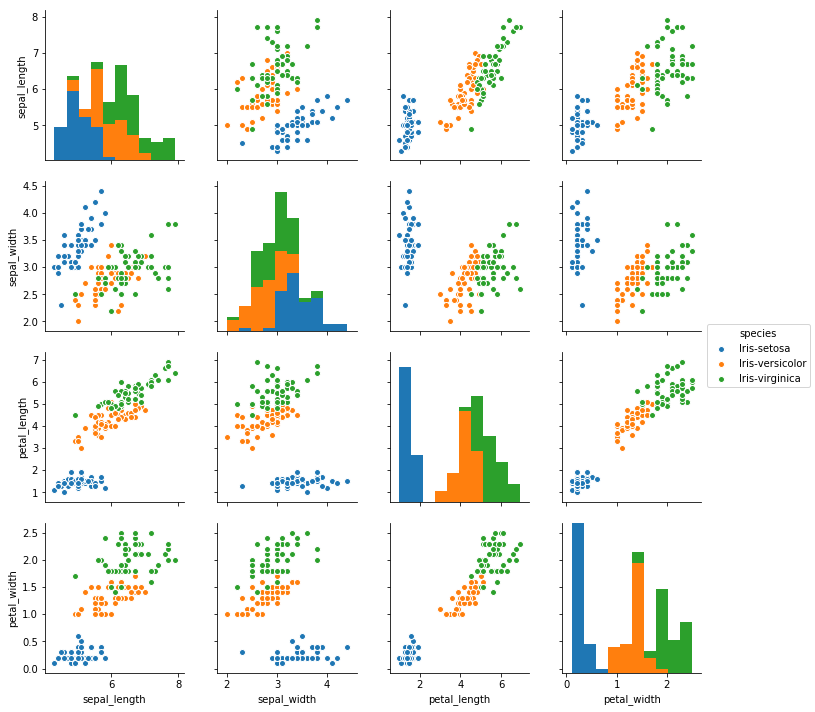

In [8]:
import seaborn as sns

sns.pairplot(iris, hue='species')

# 2.2 Data Preprocessing

Lets map each `iris species` to numbers for easier calculation.

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris['species_num'] = le.fit_transform(iris['species'])

A new column i.e. `species_num` is added to the `iris` DataFrame.

In [10]:
iris.sample(n=10)

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
80,5.5,2.4,3.8,1.1,Iris-versicolor,1
120,6.9,3.2,5.7,2.3,Iris-virginica,2
123,6.3,2.7,4.9,1.8,Iris-virginica,2
49,5.0,3.3,1.4,0.2,Iris-setosa,0
76,6.8,2.8,4.8,1.4,Iris-versicolor,1
83,6.0,2.7,5.1,1.6,Iris-versicolor,1
12,4.8,3.0,1.4,0.1,Iris-setosa,0
31,5.4,3.4,1.5,0.4,Iris-setosa,0
108,6.7,2.5,5.8,1.8,Iris-virginica,2
135,7.7,3.0,6.1,2.3,Iris-virginica,2


### Split data into training and test sets

In [15]:
from sklearn.model_selection import train_test_split

X_temp = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y_temp = iris['species_num']

#split the dataset into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X_temp,y_temp,test_size=0.40, random_state=42)

In [16]:
iris.shape,X_train.shape,y_train.shape,  X_test.shape, y_test.shape

((150, 6), (90, 4), (90,), (60, 4), (60,))

<IPython.core.display.Javascript object>


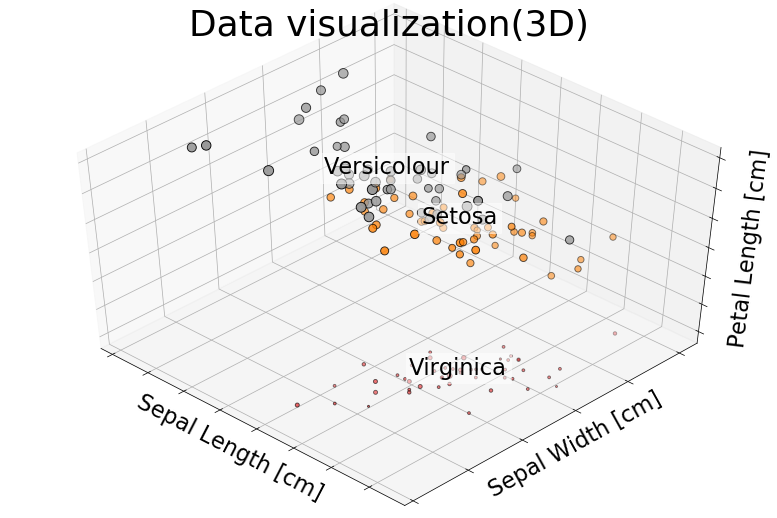

[]

In [17]:
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(12, 8))
ax = Axes3D(fig, elev=48, azim=134)
X = X_temp.values
y = y_temp.values
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s = X[:, 3]*50)

for name, label in [('Virginica', 0), ('Setosa', 1), ('Versicolour', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean(),
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),size=25)

ax.set_title("Data visualization(3D)", fontsize=40)
ax.set_xlabel("Sepal Length [cm]", fontsize=25)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Sepal Width [cm]", fontsize=25)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Petal Length [cm]", fontsize=25)
ax.w_zaxis.set_ticklabels([])

### 2.3 Build sklearn KNN Classifier
Now we'll import the classifier and instantiate the model.

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

Fit the model with our training dataset.

In [19]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [20]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 98.33 %.


In [21]:
from sklearn.model_selection import cross_val_score
import numpy as np
cv_scores = []
neighbors = range(1,40,2)

In [22]:
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())


The optimal number of neighbors is 7


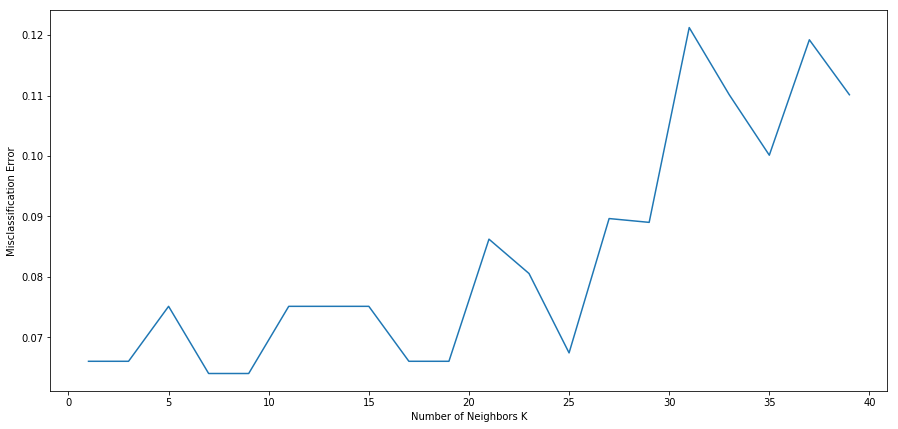

In [23]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15.0, 7.0)

# Converting accuraracies to misclassification errors
errors = [1-x for x in cv_scores]

# determining best k
optimal_k = neighbors[errors.index(min(errors))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, errors)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()